### Assignment 15
**Objective**: Predicting the mask for the forground object
Input: Background, Background+object
Output : Mask for Object

Data Transformations:
1. Rotate for image and mask
2. Horizontal flip of Background


In [0]:
# from google.colab import drive
# drive.mount('/content/gdrive/')

In [0]:
import sys
sys.path.append("/content/drive/My Drive/background_subtraction/")

In [0]:
from torchvision import transforms
from torchsummary import summary
import timeit
from custom_dataset import imageMaskBackgroundDataset
from data_loader import dataLoader
from utils import show_masked_data_and_bg_batch
from custom_transform import NewToTensor, NewNormalise, NewRotate, NewRandomHorizontalFlip
from accuracy import showMeasurePlots
from bg_sub_model_6channel import ResNet18
from model_sigmoid import ResNet18_sigmoid
from custom_model import bsNet
from trainmodel import trainModel
from testmodel import testModel
import torch.nn as nn
import matplotlib.pyplot as plt
from config_gpu import *

In [0]:
device = "cuda"

batch_size = 16

channel_means = [0.5,0.5,0.5]
channel_stdevs = [0.2,0.2,0.2]

dataroot = "/content/drive/My Drive/Data/background_subtraction/mini_multiple_bg_multi_foreground/"
trainroot = os.path.join(dataroot,"train_data")
testroot = os.path.join(dataroot,"test_data")

In [16]:
# Iterating through the dataset
# Iterating through the dataset
train_transform = transforms.Compose([NewRotate(10),NewRandomHorizontalFlip(), NewToTensor(),
                                        NewNormalise(channel_means,channel_stdevs)
                                       ])
test_transform = transforms.Compose([NewToTensor(),
                                        NewNormalise(channel_means,channel_stdevs)
                                       ])

train_dataset  = imageMaskBackgroundDataset(csv_file = trainroot+"/train.csv",
                                  root_dir = trainroot,
                                  transform = train_transform)
val_dataset  = imageMaskBackgroundDataset(csv_file = testroot+"/train.csv",
                                  root_dir = testroot,
                                  transform = test_transform)

print("Images in Train:", len(train_dataset))
print("Images in Test:", len(val_dataset))


Images in Train: 2560
Images in Test: 160


In [17]:
batch_size = 16
dataloader = dataLoader(device = device, batch_size=batch_size)
trainloader, testloader = dataloader(train_dataset,val_dataset)

Initiated Data Loader with: {'shuffle': True, 'batch_size': 16, 'num_workers': 4, 'pin_memory': True}
Time Taken: 4.585001079249196e-06
Data Load Time: 0.0005380580005294178


Plotting images from Train Set
Batch:0, Train Batch Size:torch.Size([16, 3, 128, 128]), Test Batch Size:torch.Size([16, 128, 128]), Background Batch Size:torch.Size([16, 3, 128, 128])
Plotting images from Test Set
Batch:0, Train Batch Size:torch.Size([16, 3, 128, 128]), Test Batch Size:torch.Size([16, 128, 128]), Background Batch Size:torch.Size([16, 3, 128, 128])


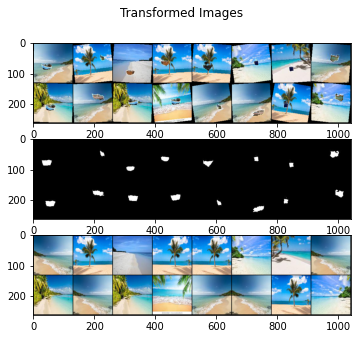

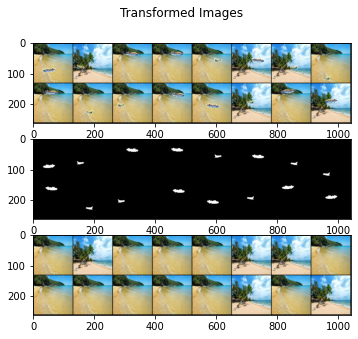

In [18]:
#Iterate over the dataset
for i_batch, sample_batched in enumerate(trainloader):
    print("Plotting images from Train Set")
    # print(sample_batched.keys())
    print("Batch:{}, Train Batch Size:{}, Test Batch Size:{}, Background Batch Size:{}".format(i_batch, sample_batched[0].size(), sample_batched[1].size(),sample_batched[2].size()))
    if i_batch == 0:
        show_masked_data_and_bg_batch(sample_batched)
        break
for i_batch, sample_batched in enumerate(testloader):
    print("Plotting images from Test Set")
    print("Batch:{}, Train Batch Size:{}, Test Batch Size:{}, Background Batch Size:{}".format(i_batch, sample_batched[0].size(),sample_batched[1].size(),sample_batched[2].size() ))
    if i_batch == 0:
        show_masked_data_and_bg_batch(sample_batched)
        break

In [7]:
#Load the model
model = ResNet18().to(device)
summary(model, input_size=(6, 128, 128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 128, 128]          18,816
       BatchNorm2d-2         [-1, 64, 128, 128]             128
         MaxPool2d-3           [-1, 64, 64, 64]               0
            Conv2d-4           [-1, 64, 64, 64]          36,864
       BatchNorm2d-5           [-1, 64, 64, 64]             128
         MaxPool2d-6           [-1, 64, 32, 32]               0
            Conv2d-7           [-1, 64, 32, 32]          36,864
       BatchNorm2d-8           [-1, 64, 32, 32]             128
            Conv2d-9           [-1, 64, 32, 32]          36,864
      BatchNorm2d-10           [-1, 64, 32, 32]             128
       BasicBlock-11           [-1, 64, 32, 32]               0
           Conv2d-12           [-1, 64, 32, 32]          36,864
      BatchNorm2d-13           [-1, 64, 32, 32]             128
           Conv2d-14           [-1, 64,

MSE Loss with Adam

  0%|          | 0/160 [00:00<?, ?it/s]

EPOCH: 0


loss=0.00570122804492712 batch_id=159: 100%|██████████| 160/160 [11:27<00:00,  4.30s/it]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.1281806
0.0 1.0

Test set: Average loss: 0.0193

Total Time for a epoch 705.9347946010001
EPOCH: 1


loss=0.002810330828651786 batch_id=159: 100%|██████████| 160/160 [00:25<00:00,  6.32it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.2704768
0.0 1.0

Test set: Average loss: 0.0133

Total Time for a epoch 26.898597776000088
EPOCH: 2


loss=0.0022034915164113045 batch_id=159: 100%|██████████| 160/160 [00:26<00:00,  6.05it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.160045
0.0 1.0

Test set: Average loss: 0.0146

Total Time for a epoch 27.84947167999985
EPOCH: 3


loss=0.002480078022927046 batch_id=159: 100%|██████████| 160/160 [00:25<00:00,  6.25it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.2265539
0.0 1.0

Test set: Average loss: 0.0078

Total Time for a epoch 27.364760907000118
EPOCH: 4


loss=0.001995648490265012 batch_id=159: 100%|██████████| 160/160 [00:24<00:00,  6.40it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.2684485
0.0 1.0

Test set: Average loss: 0.0142

Total Time for a epoch 26.440688474999888
EPOCH: 5


loss=0.0015822064597159624 batch_id=159: 100%|██████████| 160/160 [00:26<00:00,  6.14it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.2043445
0.0 1.0

Test set: Average loss: 0.0164

Total Time for a epoch 27.51658500999997
EPOCH: 6


loss=0.0014493544586002827 batch_id=159: 100%|██████████| 160/160 [00:24<00:00,  6.53it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.2528375
0.0 1.0

Test set: Average loss: 0.0104

Total Time for a epoch 25.86688111400008
EPOCH: 7


loss=0.001615219982340932 batch_id=159: 100%|██████████| 160/160 [00:25<00:00,  6.31it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.1705731
0.0 1.0

Test set: Average loss: 0.0093

Total Time for a epoch 26.764900925999882
EPOCH: 8


loss=0.001256981398910284 batch_id=159: 100%|██████████| 160/160 [00:25<00:00,  6.38it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.1780447
0.0 1.0

Test set: Average loss: 0.0122

Total Time for a epoch 26.520094396000104
EPOCH: 9


loss=0.0012758818920701742 batch_id=159: 100%|██████████| 160/160 [00:26<00:00,  5.98it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.1741546
0.0 1.0

Test set: Average loss: 0.0109

Total Time for a epoch 28.228313587000002
EPOCH: 10


loss=0.0015440635615959764 batch_id=159: 100%|██████████| 160/160 [00:25<00:00,  6.31it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.2141008
0.0 1.0

Test set: Average loss: 0.0144

Total Time for a epoch 26.686376586999813
EPOCH: 11


loss=0.0013104461831972003 batch_id=159: 100%|██████████| 160/160 [00:24<00:00,  6.42it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.2306962
0.0 1.0

Test set: Average loss: 0.0129

Total Time for a epoch 26.301350643000205
EPOCH: 12


loss=0.0011298959143459797 batch_id=159: 100%|██████████| 160/160 [00:25<00:00,  6.21it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.144747
0.0 1.0

Test set: Average loss: 0.0115

Total Time for a epoch 27.178359152999974
EPOCH: 13


loss=0.0010204351274296641 batch_id=159: 100%|██████████| 160/160 [00:24<00:00,  6.44it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.19803
0.0 1.0

Test set: Average loss: 0.0081

Total Time for a epoch 26.188666702999853
EPOCH: 14


loss=0.0009596928721293807 batch_id=159: 100%|██████████| 160/160 [00:25<00:00,  6.36it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.2246649
0.0 1.0

Test set: Average loss: 0.0073

Total Time for a epoch 26.59377438399997
EPOCH: 15


loss=0.0015897736884653568 batch_id=159: 100%|██████████| 160/160 [00:25<00:00,  6.27it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.122468
0.0 1.0

Test set: Average loss: 0.0114

Total Time for a epoch 26.879029554
EPOCH: 16


loss=0.0011146413162350655 batch_id=159: 100%|██████████| 160/160 [00:26<00:00,  5.98it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.2855921
0.0 1.0

Test set: Average loss: 0.0068

Total Time for a epoch 28.239627807000033
EPOCH: 17


loss=0.0007928204722702503 batch_id=159: 100%|██████████| 160/160 [00:25<00:00,  6.27it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.3068084
0.0 1.0

Test set: Average loss: 0.0059

Total Time for a epoch 27.005461291000074
EPOCH: 18


loss=0.0011175795225426555 batch_id=159: 100%|██████████| 160/160 [00:24<00:00,  6.41it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.2785251
0.0 1.0

Test set: Average loss: 0.0046

Total Time for a epoch 26.384396597999967
EPOCH: 19


loss=0.0008977557299658656 batch_id=159: 100%|██████████| 160/160 [00:25<00:00,  6.18it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.2923476
0.0 1.0

Test set: Average loss: 0.0053

Total Time for a epoch 27.282237944000144
EPOCH: 20


loss=0.0007838037563487887 batch_id=159: 100%|██████████| 160/160 [00:25<00:00,  6.32it/s]


Showing the Last Batch


/content/drive/My Drive/background_subtraction/utils.py:100: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(12,5))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

0.0 1.2480105
0.0 1.0

Test set: Average loss: 0.0129

Total Time for a epoch 27.346496476000084
EPOCH: 21


loss=0.0009981996845453978 batch_id=159: 100%|██████████| 160/160 [00:25<00:00,  6.40it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.3742747
0.0 1.0

Test set: Average loss: 0.0165

Total Time for a epoch 26.43969873700007
EPOCH: 22


loss=0.0010881397174671292 batch_id=159: 100%|██████████| 160/160 [00:25<00:00,  6.15it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.3623444
0.0 1.0

Test set: Average loss: 0.0100

Total Time for a epoch 27.431441034000045
EPOCH: 23


loss=0.000741525087505579 batch_id=159: 100%|██████████| 160/160 [00:24<00:00,  6.44it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.4643643
0.0 1.0

Test set: Average loss: 0.0124

Total Time for a epoch 26.29817118400001
EPOCH: 24


loss=0.0007449148688465357 batch_id=159: 100%|██████████| 160/160 [00:26<00:00,  5.97it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Showing the Last Batch
0.0 1.5033565
0.0 1.0

Test set: Average loss: 0.0064

Total Time for a epoch 28.235283125000024
Total Time: 1353.8807554000002


/content/drive/My Drive/background_subtraction/accuracy.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10,4))


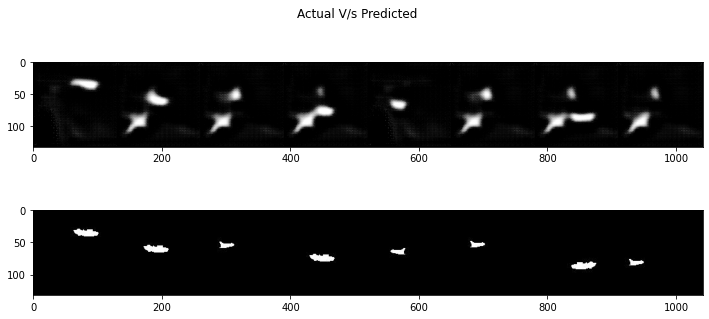

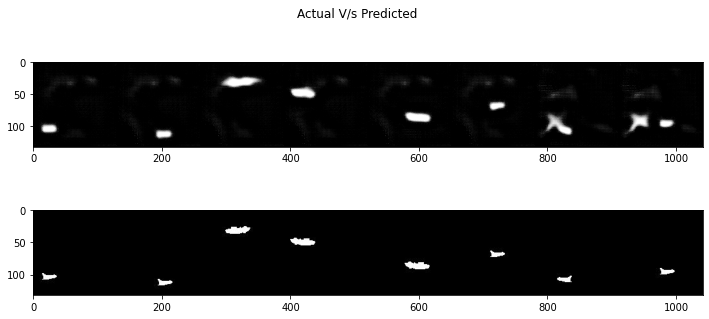

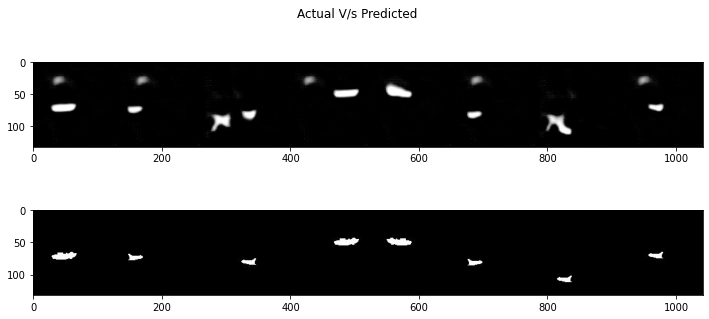

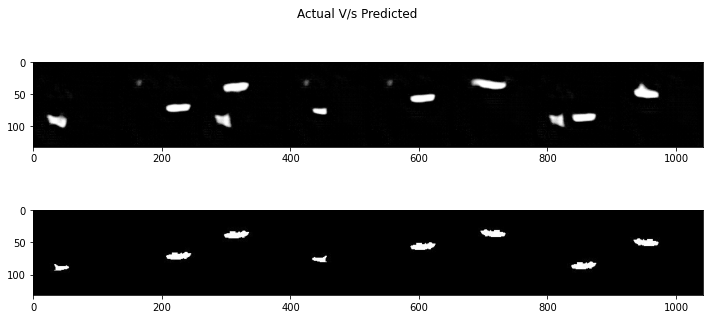

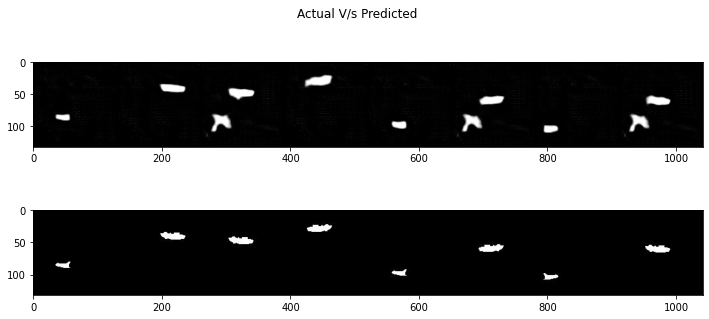

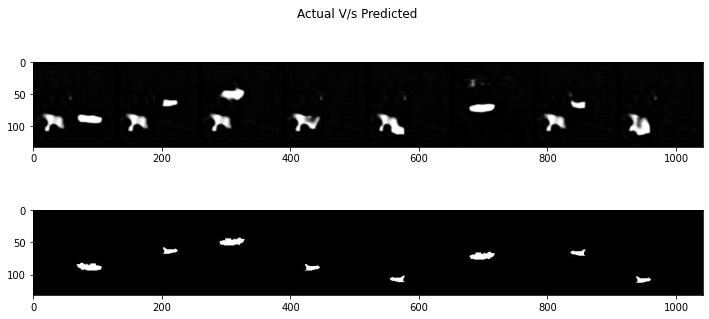

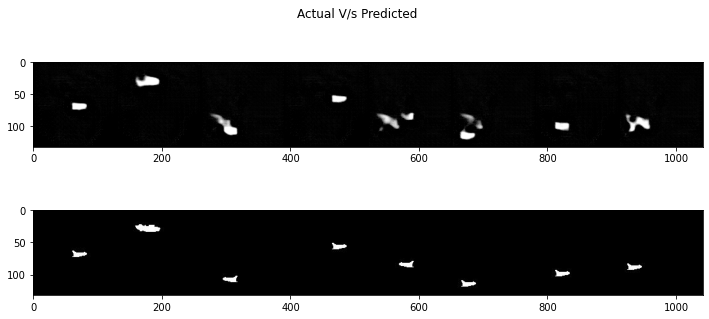

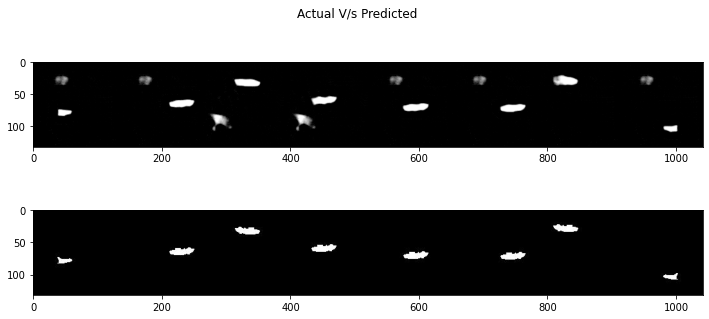

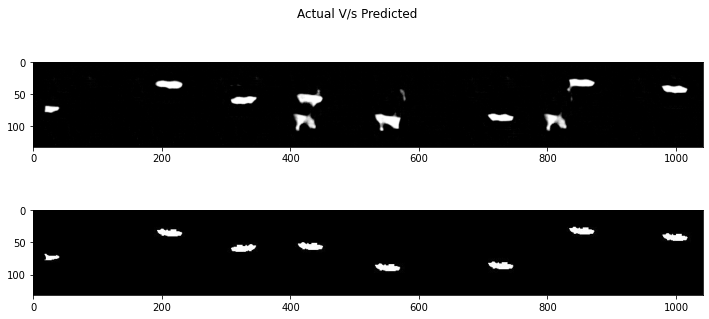

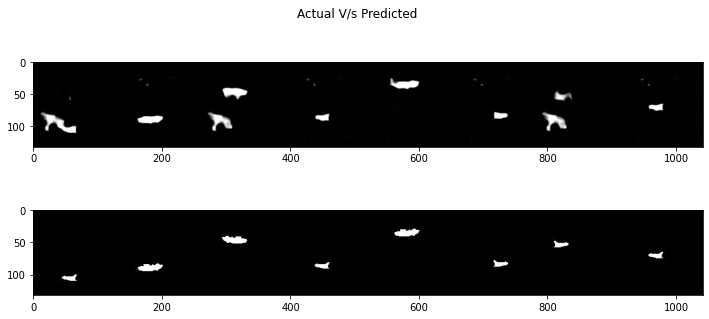

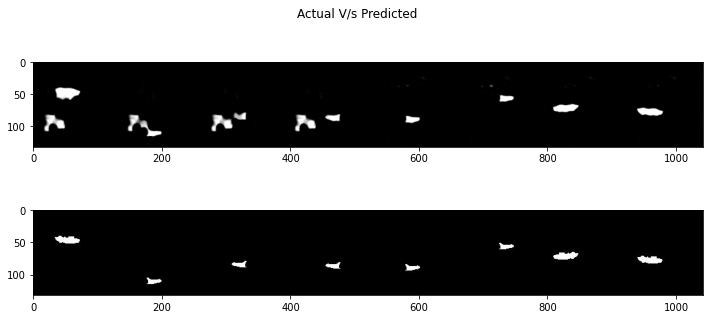

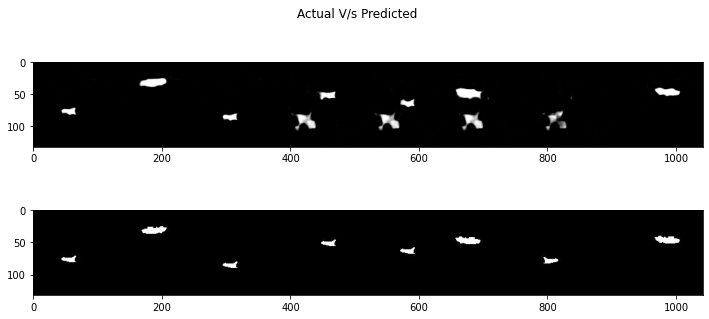

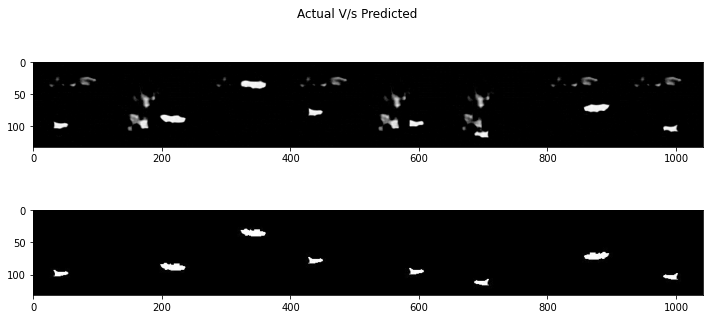

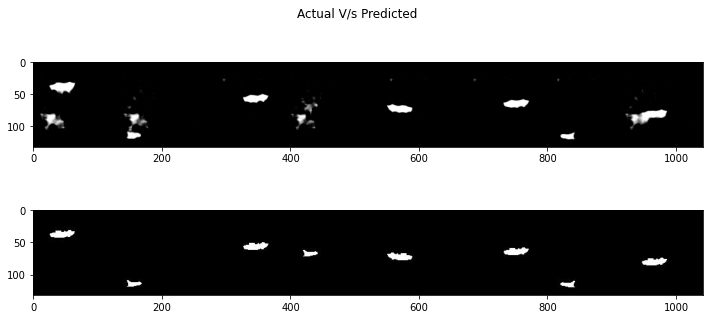

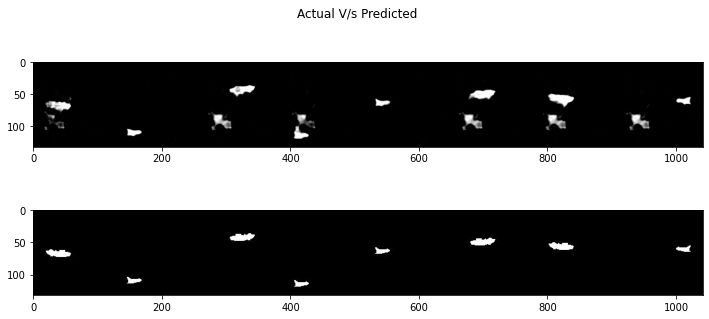

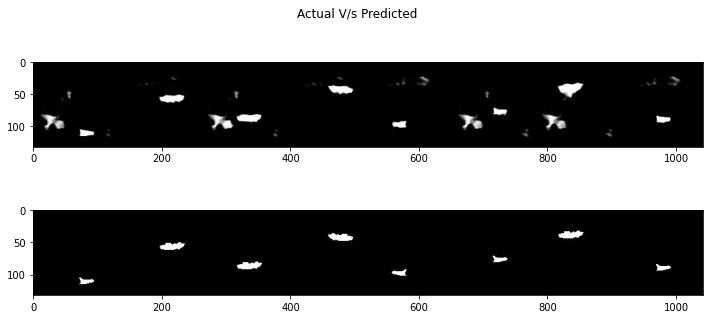

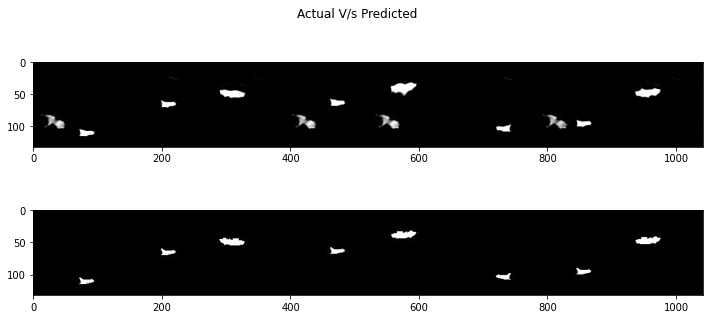

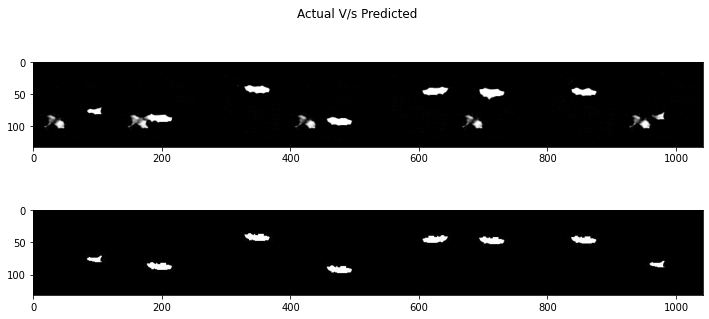

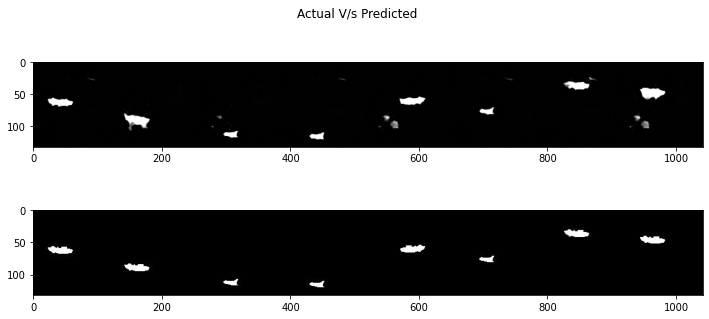

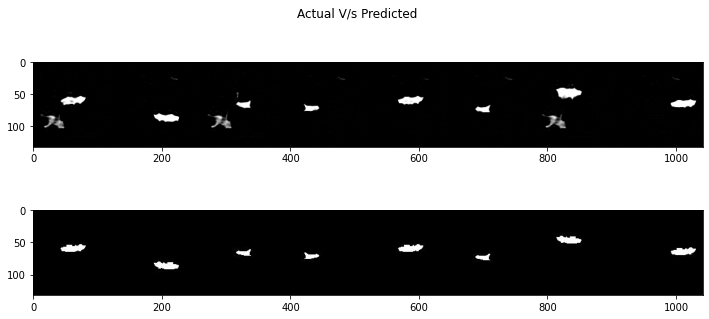

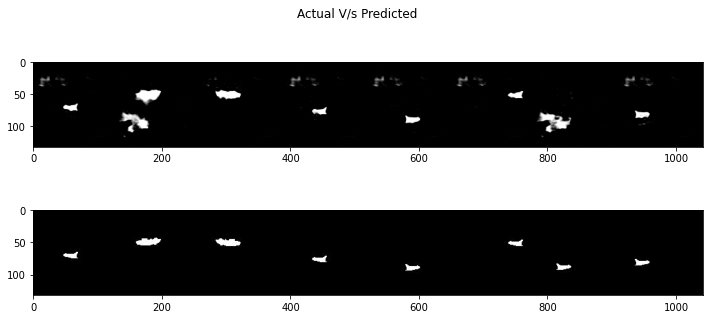

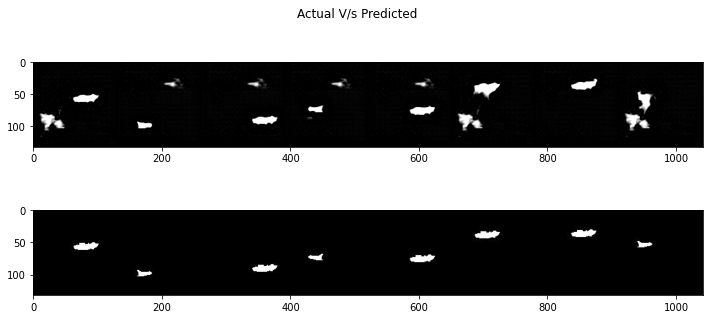

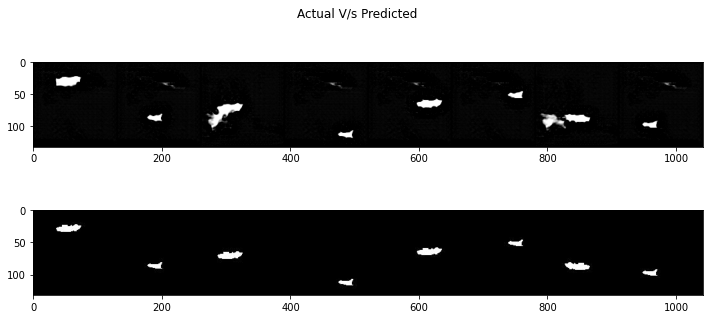

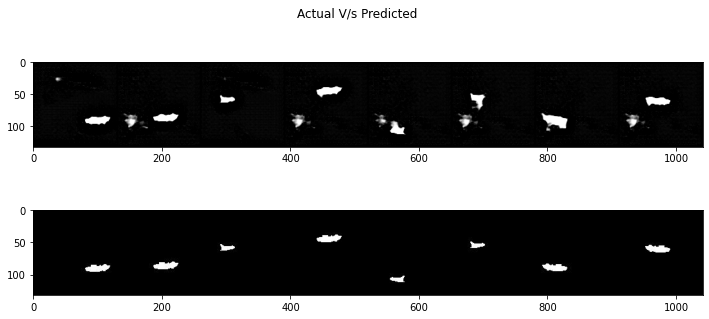

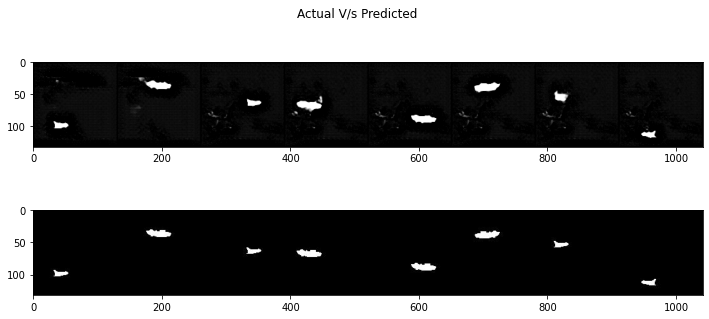

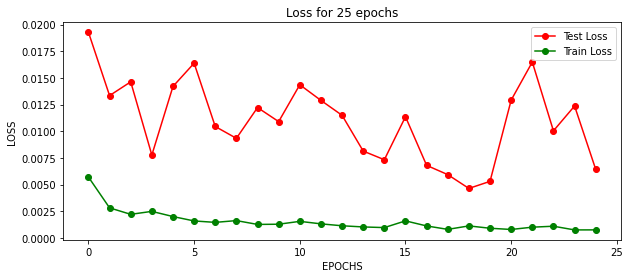

In [8]:
optimizer = torch.optim.Adam(model.parameters(),weight_decay=1e-5)
epochs = 25
loss_func = nn.MSELoss()
test_losses = []
train_losses = []
train_batch_timer = []
test_batch_timer = []
train_model = trainModel()
test_model = testModel()
start = timeit.default_timer()
for epoch in range(0, epochs):
    epoch_start = timeit.default_timer()
    print("EPOCH:",epoch)
    train_model.train(model, device, trainloader,optimizer,loss_func,train_losses,train_batch_timer)
    test_model.test(model, device, testloader, loss_func,test_losses,test_batch_timer)
    epoch_end = timeit.default_timer()
    print("Total Time for a epoch",(epoch_end-epoch_start))
end = timeit.default_timer()

print("Total Time:",(end - start))

torch.save(model, dataroot+"model")
showMeasurePlots.plot_loss_curves(train_losses,test_losses,epochs)

  0%|          | 0/160 [00:00<?, ?it/s]

EPOCH: 0


  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 0.8047743
0.0 1.0

Test set: Average loss: 0.0155

Total Time for a epoch 26.173769190999337
EPOCH: 1


loss=0.016197284683585167 batch_id=159: 100%|██████████| 160/160 [00:24<00:00,  6.67it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.003598
0.0 1.0

Test set: Average loss: 0.0135

Total Time for a epoch 25.421902030999263
EPOCH: 2


  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 0.80542904
0.0 1.0

Test set: Average loss: 0.0130

Total Time for a epoch 27.0717677319999
EPOCH: 3


loss=0.012561768293380737 batch_id=159: 100%|██████████| 160/160 [00:24<00:00,  6.55it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.0026248
0.0 1.0

Test set: Average loss: 0.0125

Total Time for a epoch 25.82569044400043
EPOCH: 4


  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 0.9353909
0.0 1.0

Test set: Average loss: 0.0119

Total Time for a epoch 26.66243868299989
EPOCH: 5


loss=0.011555327102541924 batch_id=159: 100%|██████████| 160/160 [00:24<00:00,  6.49it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.2360501
0.0 1.0

Test set: Average loss: 0.0125

Total Time for a epoch 26.243725400000585
EPOCH: 6


loss=0.009434257633984089 batch_id=159: 100%|██████████| 160/160 [00:25<00:00,  6.16it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.2499298
0.0 1.0

Test set: Average loss: 0.0127

Total Time for a epoch 27.34936604199993
EPOCH: 7


  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 0.91878456
0.0 1.0

Test set: Average loss: 0.0114

Total Time for a epoch 26.124460368000655
EPOCH: 8


loss=0.009585302323102951 batch_id=159: 100%|██████████| 160/160 [00:24<00:00,  6.47it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Showing the Last Batch
0.0 1.2180386


  0%|          | 0/160 [00:00<?, ?it/s]

0.0 1.0

Test set: Average loss: 0.0117

Total Time for a epoch 27.282729131999986
EPOCH: 9


loss=0.009520027786493301 batch_id=159: 100%|██████████| 160/160 [00:25<00:00,  6.30it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.0200677
0.0 1.0

Test set: Average loss: 0.0110

Total Time for a epoch 26.83543871100028
EPOCH: 10


  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 0.9883976
0.0 1.0

Test set: Average loss: 0.0114

Total Time for a epoch 25.493990572000257
EPOCH: 11


  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 0.9822877
0.0 1.0

Test set: Average loss: 0.0107

Total Time for a epoch 26.14555465399917
EPOCH: 12


loss=0.008351227268576622 batch_id=159: 100%|██████████| 160/160 [00:25<00:00,  6.35it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.0042418
0.0 1.0

Test set: Average loss: 0.0112

Total Time for a epoch 26.65006262099996
EPOCH: 13


  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 0.91172767
0.0 1.0

Test set: Average loss: 0.0103

Total Time for a epoch 27.048679051999898
EPOCH: 14


loss=0.007723370101302862 batch_id=159: 100%|██████████| 160/160 [00:25<00:00,  6.26it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.1858466
0.0 1.0

Test set: Average loss: 0.0107

Total Time for a epoch 27.080751084999974
EPOCH: 15


loss=0.0056317998096346855 batch_id=159: 100%|██████████| 160/160 [00:24<00:00,  6.54it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.0313066
0.0 1.0

Test set: Average loss: 0.0104

Total Time for a epoch 25.86215930600065
EPOCH: 16


loss=0.0063910773023962975 batch_id=159: 100%|██████████| 160/160 [00:24<00:00,  6.59it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.0025145
0.0 1.0

Test set: Average loss: 0.0101

Total Time for a epoch 25.70786253999995
EPOCH: 17


loss=0.006391941104084253 batch_id=159: 100%|██████████| 160/160 [00:25<00:00,  6.35it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.1544255
0.0 1.0

Test set: Average loss: 0.0096

Total Time for a epoch 26.69411582900011
EPOCH: 18


loss=0.009491987526416779 batch_id=159: 100%|██████████| 160/160 [00:24<00:00,  6.49it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.0447836
0.0 1.0

Test set: Average loss: 0.0094

Total Time for a epoch 26.147075757000493
EPOCH: 19


loss=0.006426236592233181 batch_id=159: 100%|██████████| 160/160 [00:24<00:00,  6.59it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.1023682
0.0 1.0

Test set: Average loss: 0.0098

Total Time for a epoch 25.696483532000457
EPOCH: 20


loss=0.008074114099144936 batch_id=159: 100%|██████████| 160/160 [00:24<00:00,  6.45it/s]
/content/drive/My Drive/background_subtraction/utils.py:100: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(12,5))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.0142233
0.0 1.0

Test set: Average loss: 0.0097

Total Time for a epoch 26.30950565400053
EPOCH: 21


loss=0.007651715539395809 batch_id=159: 100%|██████████| 160/160 [00:24<00:00,  6.56it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.1644232
0.0 1.0

Test set: Average loss: 0.0098

Total Time for a epoch 25.76674710899988
EPOCH: 22


loss=0.006190549582242966 batch_id=159: 100%|██████████| 160/160 [00:26<00:00,  6.15it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.2290419
0.0 1.0

Test set: Average loss: 0.0084

Total Time for a epoch 27.58304400199995
EPOCH: 23


loss=0.008883828297257423 batch_id=159: 100%|██████████| 160/160 [00:25<00:00,  6.40it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.2729326
0.0 1.0

Test set: Average loss: 0.0087

Total Time for a epoch 26.44449583200003
EPOCH: 24


loss=0.007672523148357868 batch_id=159: 100%|██████████| 160/160 [00:24<00:00,  6.51it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.125282
0.0 1.0

Test set: Average loss: 0.0092

Total Time for a epoch 25.98995031300001
EPOCH: 25


loss=0.007044137455523014 batch_id=159: 100%|██████████| 160/160 [00:25<00:00,  6.39it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.3627893
0.0 1.0

Test set: Average loss: 0.0080

Total Time for a epoch 26.551854577000086
EPOCH: 26


loss=0.0059441206976771355 batch_id=159: 100%|██████████| 160/160 [00:24<00:00,  6.40it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.7129788
0.0 1.0

Test set: Average loss: 0.0082

Total Time for a epoch 26.421147080000082
EPOCH: 27


loss=0.007377976551651955 batch_id=159: 100%|██████████| 160/160 [00:24<00:00,  6.65it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.6355624
0.0 1.0

Test set: Average loss: 0.0084

Total Time for a epoch 25.51836427699982
EPOCH: 28


loss=0.005894224159419537 batch_id=159: 100%|██████████| 160/160 [00:24<00:00,  6.43it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.4990833
0.0 1.0

Test set: Average loss: 0.0078

Total Time for a epoch 26.30452183899979
EPOCH: 29


loss=0.006207741796970367 batch_id=159: 100%|██████████| 160/160 [00:24<00:00,  6.46it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.2443812
0.0 1.0

Test set: Average loss: 0.0095

Total Time for a epoch 26.191225479999957
EPOCH: 30


loss=0.005771336145699024 batch_id=159: 100%|██████████| 160/160 [00:25<00:00,  6.36it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.5897228
0.0 1.0

Test set: Average loss: 0.0075

Total Time for a epoch 26.74938975800069
EPOCH: 31


loss=0.006557808257639408 batch_id=159: 100%|██████████| 160/160 [00:26<00:00,  5.96it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.7993658
0.0 1.0

Test set: Average loss: 0.0076

Total Time for a epoch 28.471233297000254
EPOCH: 32


loss=0.005851309280842543 batch_id=159: 100%|██████████| 160/160 [00:24<00:00,  6.46it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.4718133
0.0 1.0

Test set: Average loss: 0.0079

Total Time for a epoch 26.239126818999466
EPOCH: 33


loss=0.006360613740980625 batch_id=159: 100%|██████████| 160/160 [00:24<00:00,  6.63it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.6212133
0.0 1.0

Test set: Average loss: 0.0083

Total Time for a epoch 25.58983432399964
EPOCH: 34


loss=0.006193552166223526 batch_id=159: 100%|██████████| 160/160 [00:25<00:00,  6.37it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.5783151
0.0 1.0

Test set: Average loss: 0.0078

Total Time for a epoch 26.59377809199941
EPOCH: 35


loss=0.005433219019323587 batch_id=159: 100%|██████████| 160/160 [00:24<00:00,  6.52it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.4775943
0.0 1.0

Test set: Average loss: 0.0081

Total Time for a epoch 25.914209368999764
EPOCH: 36


loss=0.006969233509153128 batch_id=159: 100%|██████████| 160/160 [00:24<00:00,  6.61it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.5343593
0.0 1.0

Test set: Average loss: 0.0077

Total Time for a epoch 25.670510130000366
EPOCH: 37


loss=0.005574517883360386 batch_id=159: 100%|██████████| 160/160 [00:25<00:00,  6.34it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.347142
0.0 1.0

Test set: Average loss: 0.0075

Total Time for a epoch 26.701604165999925
EPOCH: 38


loss=0.0056290533393621445 batch_id=159: 100%|██████████| 160/160 [00:24<00:00,  6.56it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.7227333
0.0 1.0

Test set: Average loss: 0.0088

Total Time for a epoch 25.795428806000018
EPOCH: 39


loss=0.005014152266085148 batch_id=159: 100%|██████████| 160/160 [00:25<00:00,  6.31it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.4789532
0.0 1.0

Test set: Average loss: 0.0076

Total Time for a epoch 26.858304092000253
EPOCH: 40


loss=0.0064398739486932755 batch_id=159: 100%|██████████| 160/160 [00:25<00:00,  6.23it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.4539386
0.0 1.0

Test set: Average loss: 0.0084

Total Time for a epoch 27.155351863999385
EPOCH: 41


loss=0.005718036089092493 batch_id=159: 100%|██████████| 160/160 [00:24<00:00,  6.59it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.454027
0.0 1.0

Test set: Average loss: 0.0088

Total Time for a epoch 25.693123355000353
EPOCH: 42


loss=0.005052169784903526 batch_id=159: 100%|██████████| 160/160 [00:24<00:00,  6.65it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.7547364
0.0 1.0

Test set: Average loss: 0.0081

Total Time for a epoch 25.57722971200019
EPOCH: 43


loss=0.006057652644813061 batch_id=159: 100%|██████████| 160/160 [00:24<00:00,  6.45it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.4222027
0.0 1.0

Test set: Average loss: 0.0078

Total Time for a epoch 26.222484161000466
EPOCH: 44


loss=0.0046911281533539295 batch_id=159: 100%|██████████| 160/160 [00:24<00:00,  6.65it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.4146258
0.0 1.0

Test set: Average loss: 0.0079

Total Time for a epoch 25.539922214999933
EPOCH: 45


loss=0.00499084684997797 batch_id=159: 100%|██████████| 160/160 [00:24<00:00,  6.45it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.5612494
0.0 1.0

Test set: Average loss: 0.0085

Total Time for a epoch 26.328210016999947
EPOCH: 46


loss=0.004888676572591066 batch_id=159: 100%|██████████| 160/160 [00:24<00:00,  6.48it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.3414005
0.0 1.0

Test set: Average loss: 0.0072

Total Time for a epoch 26.08277390300009
EPOCH: 47


loss=0.004817198030650616 batch_id=159: 100%|██████████| 160/160 [00:25<00:00,  6.27it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.3736784
0.0 1.0

Test set: Average loss: 0.0075

Total Time for a epoch 27.006324287000098
EPOCH: 48


loss=0.005083691794425249 batch_id=159: 100%|██████████| 160/160 [00:24<00:00,  6.51it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/160 [00:00<?, ?it/s]

Showing the Last Batch
0.0 1.6339344
0.0 1.0

Test set: Average loss: 0.0072

Total Time for a epoch 26.08664991400019
EPOCH: 49


loss=0.0057198768481612206 batch_id=159: 100%|██████████| 160/160 [00:24<00:00,  6.52it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Showing the Last Batch
0.0 1.3724781
0.0 1.0

Test set: Average loss: 0.0083

Total Time for a epoch 25.900579524000023
Total Time: 1316.7864294839992


/content/drive/My Drive/background_subtraction/accuracy.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10,4))


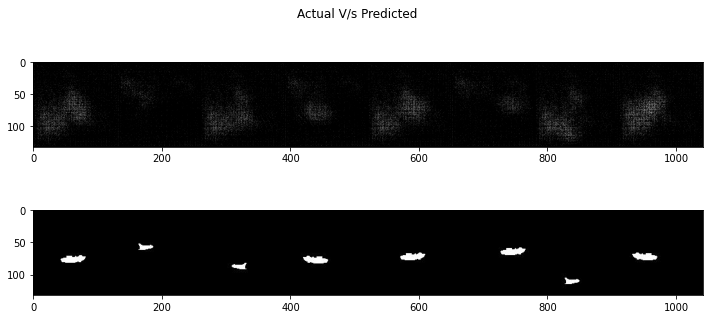

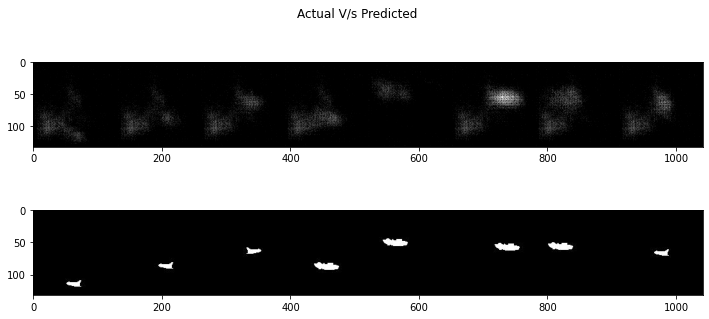

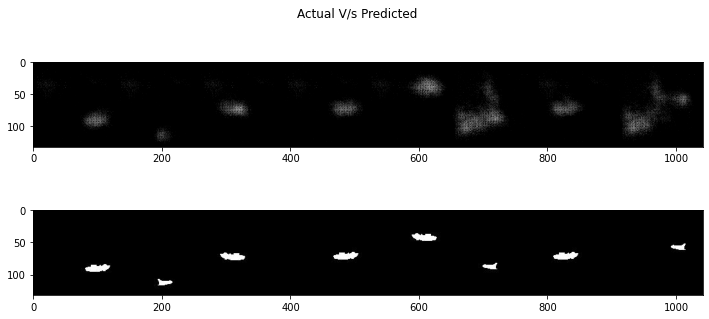

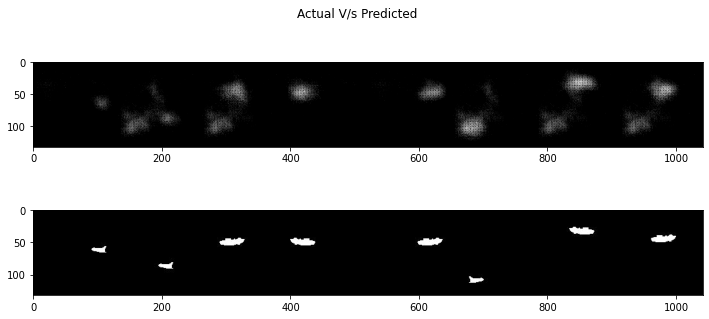

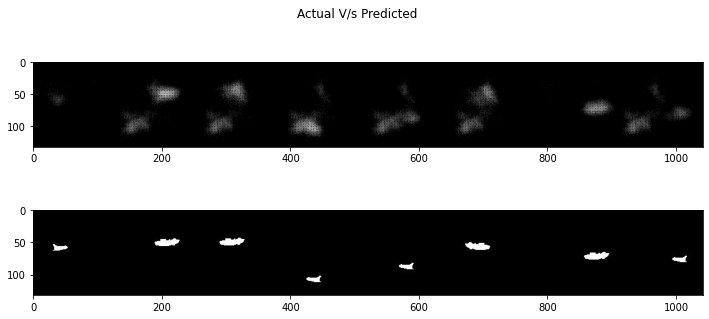

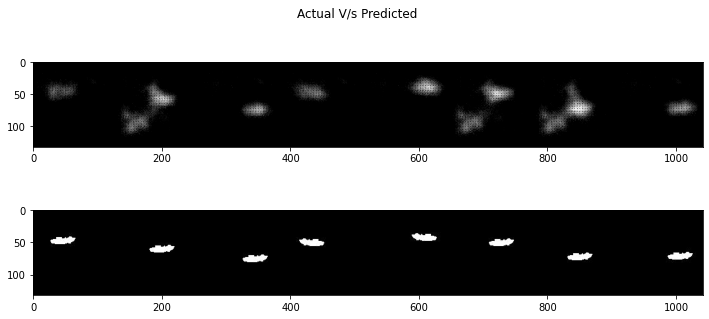

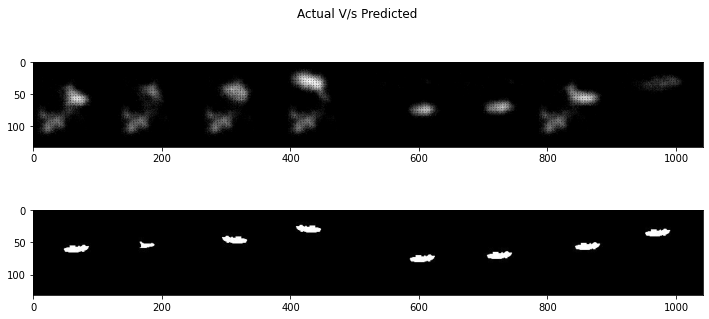

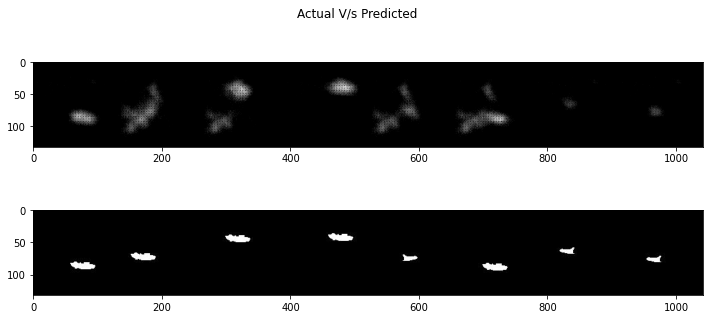

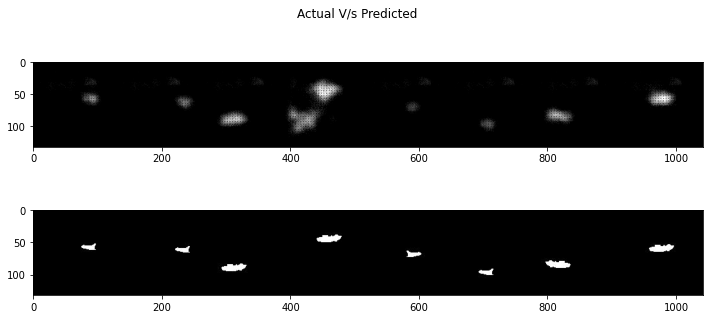

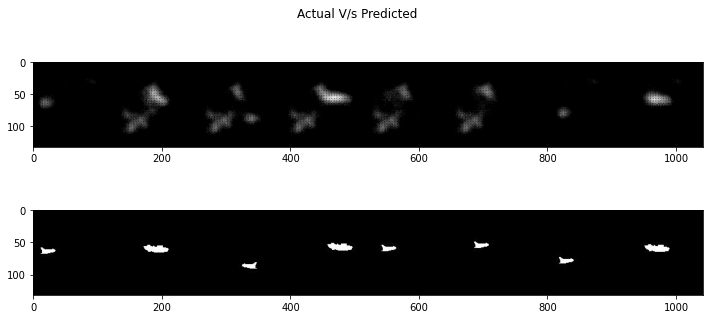

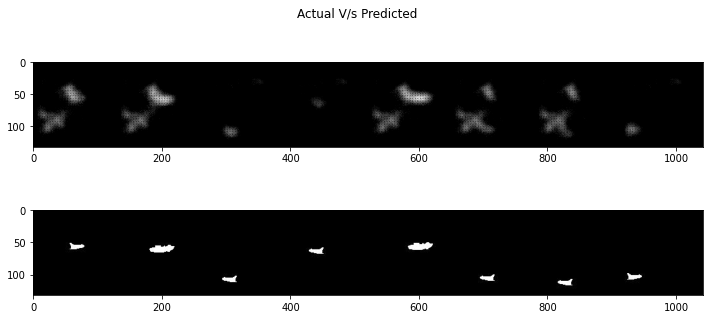

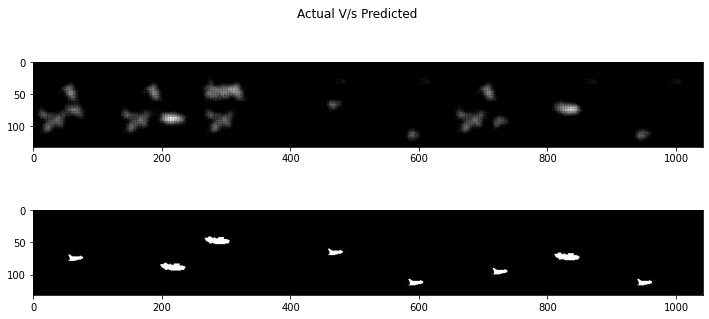

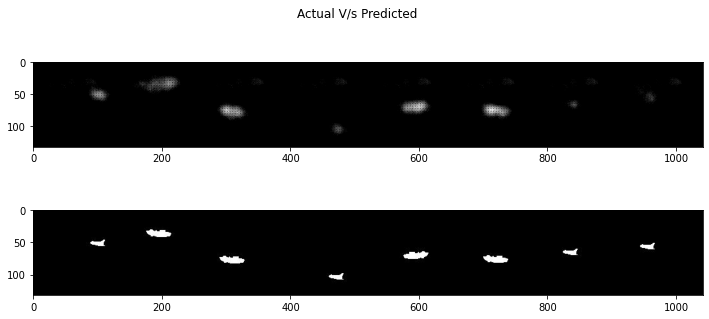

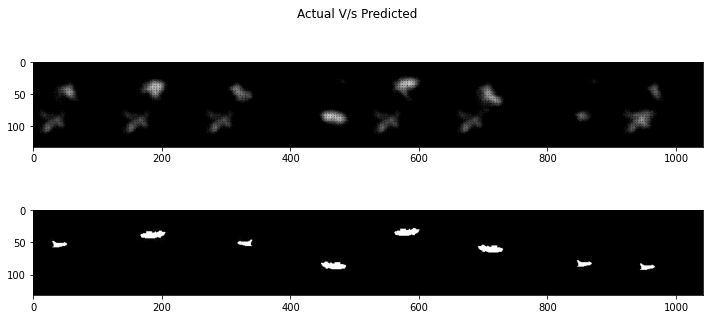

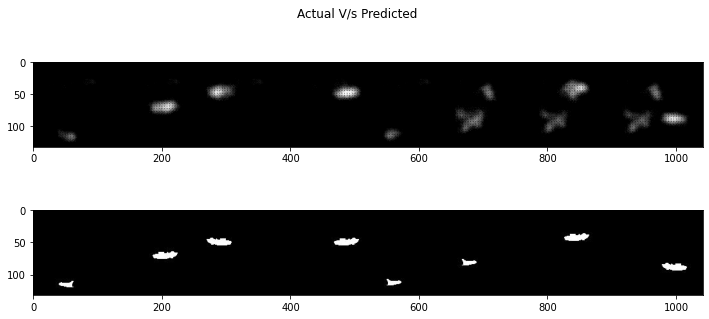

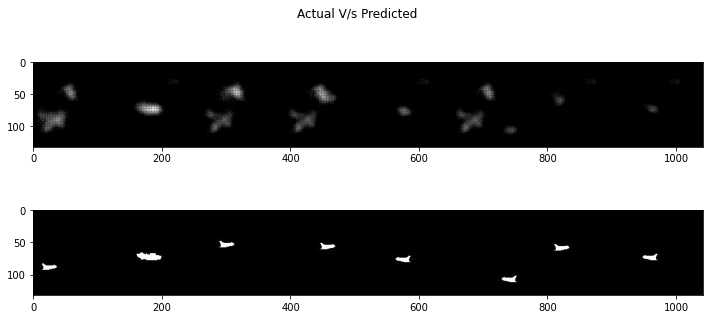

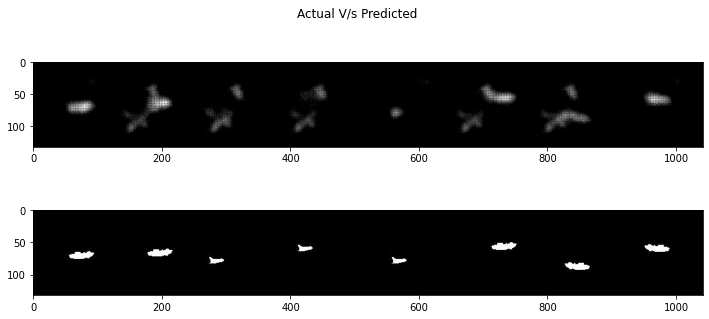

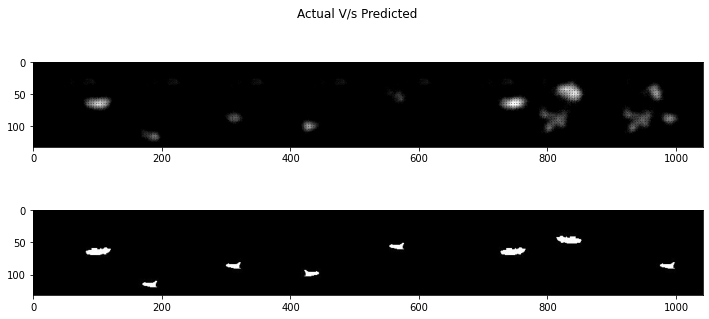

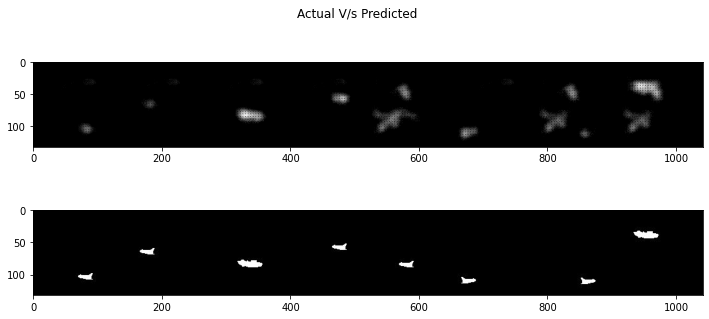

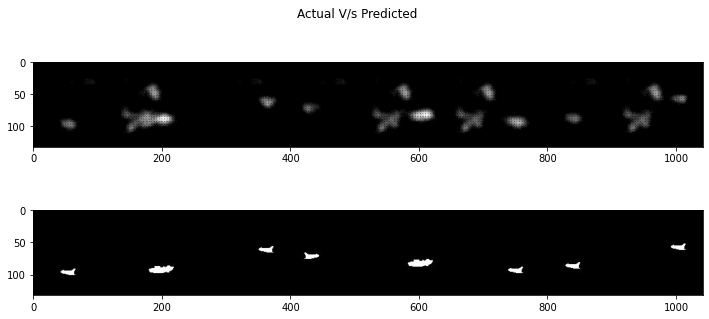

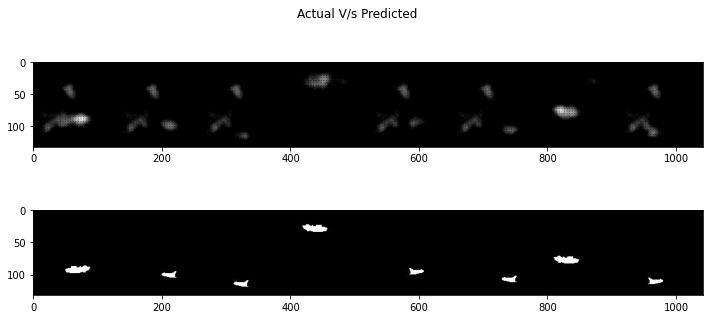

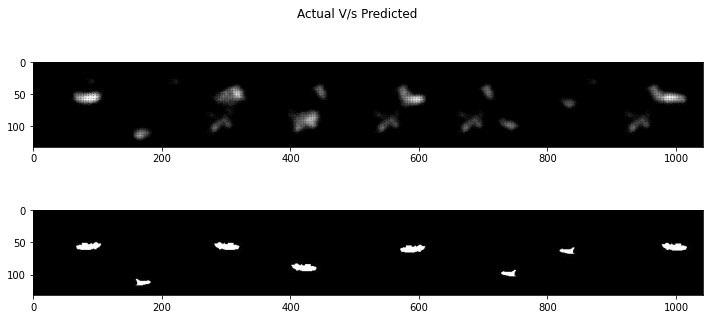

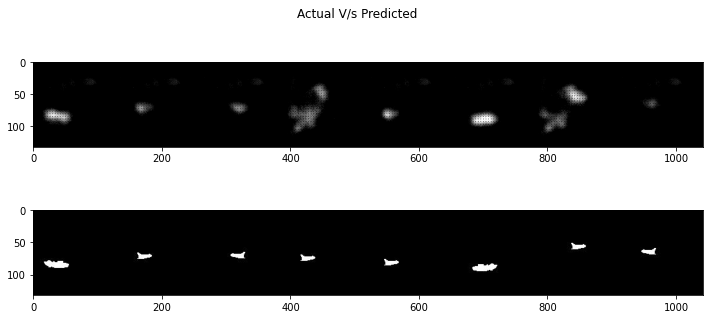

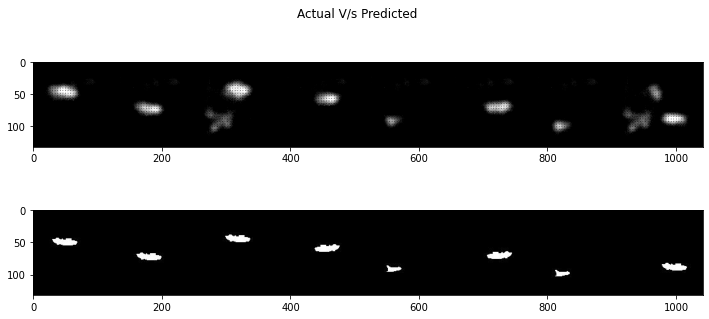

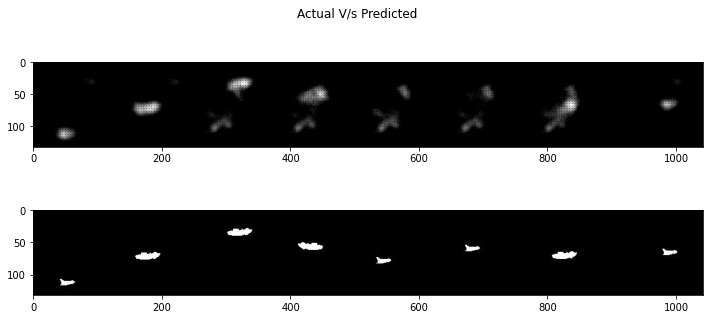

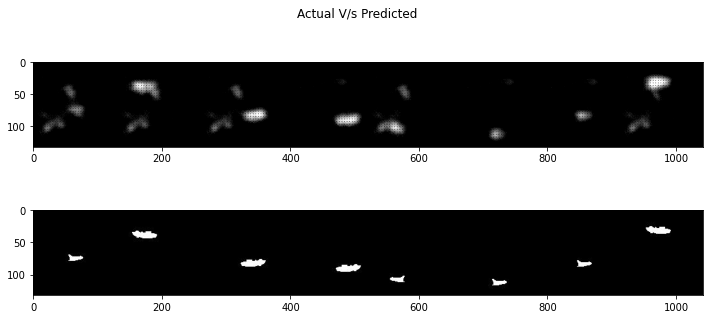

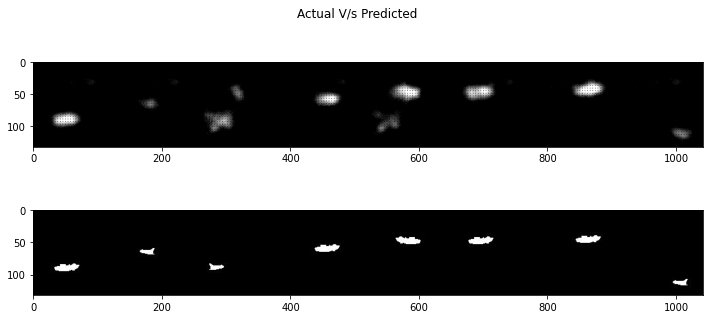

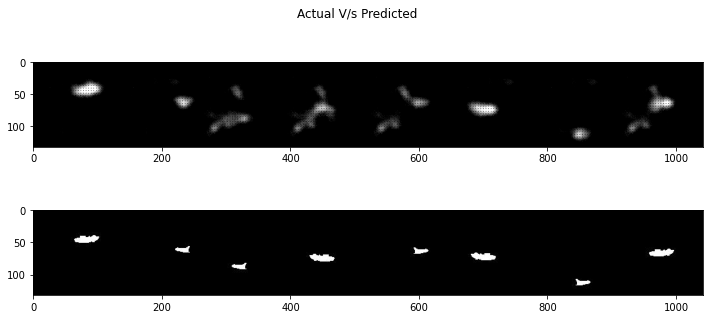

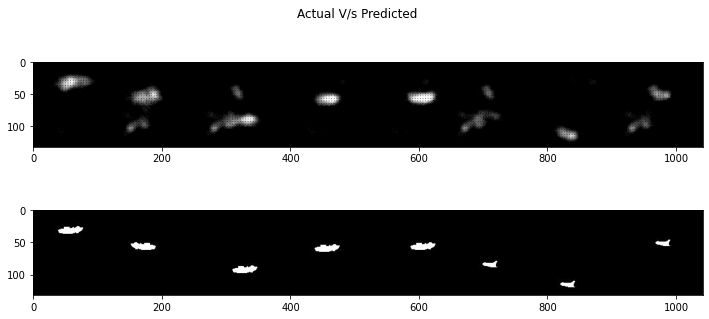

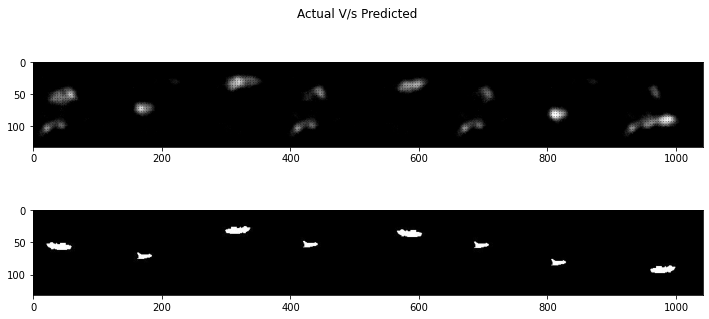

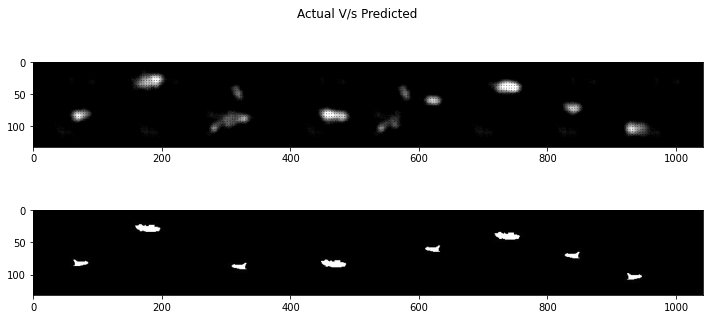

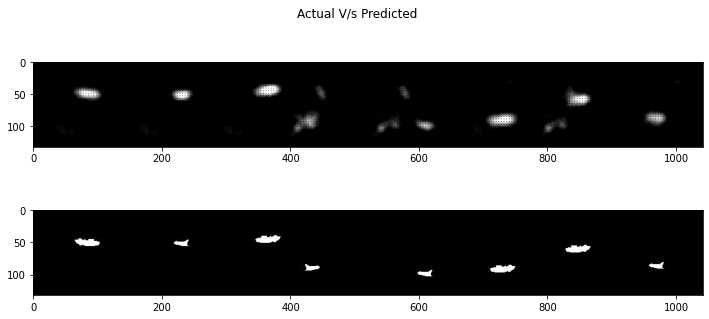

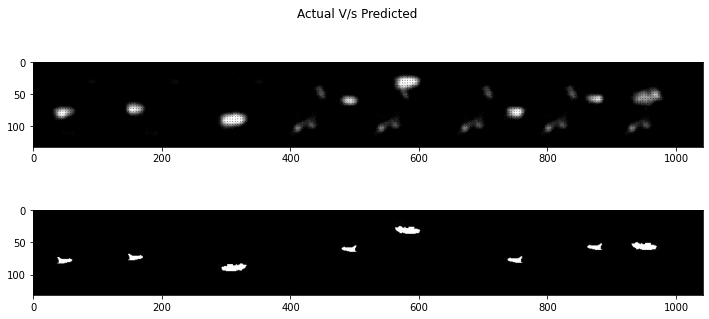

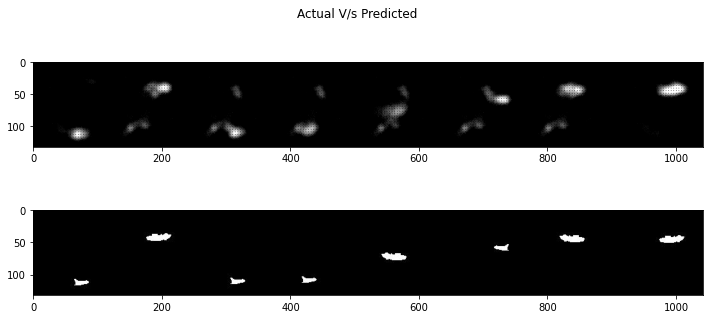

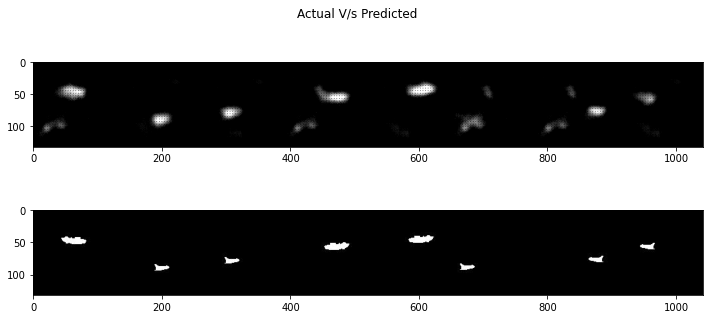

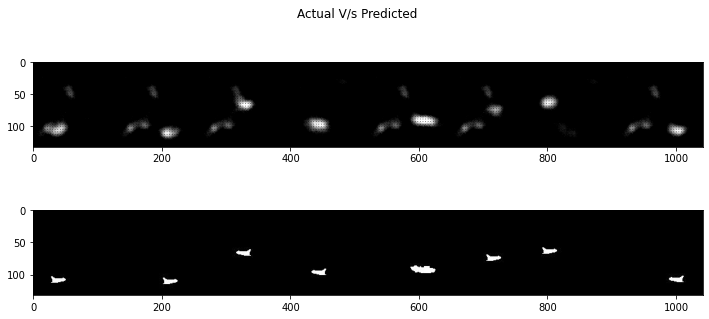

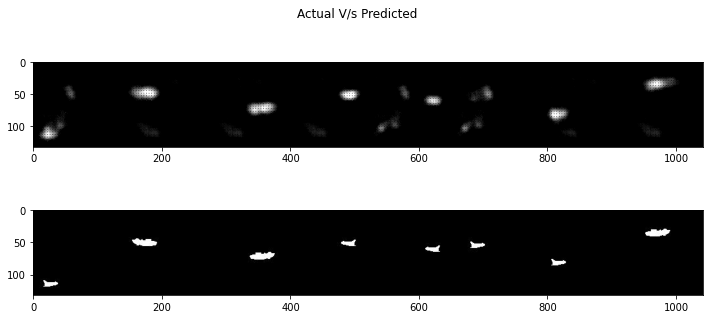

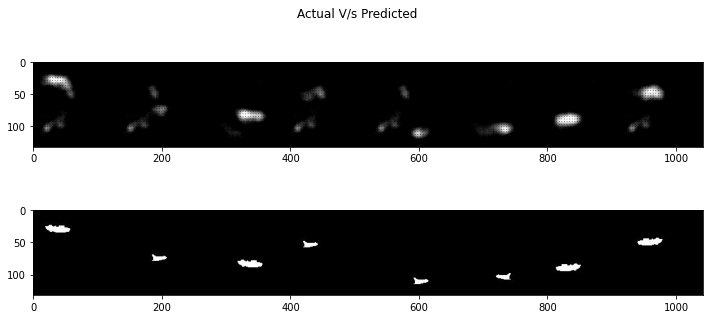

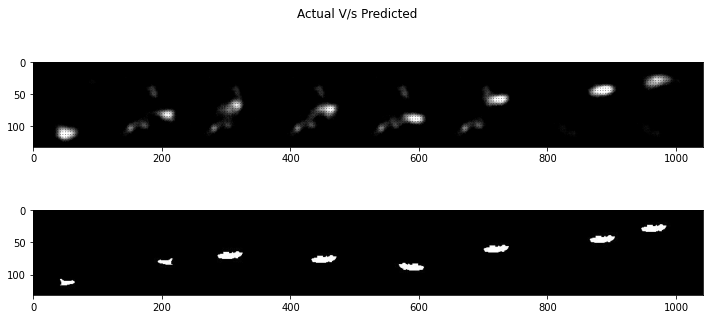

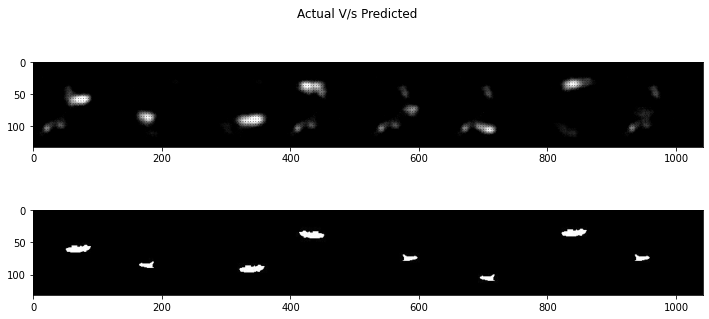

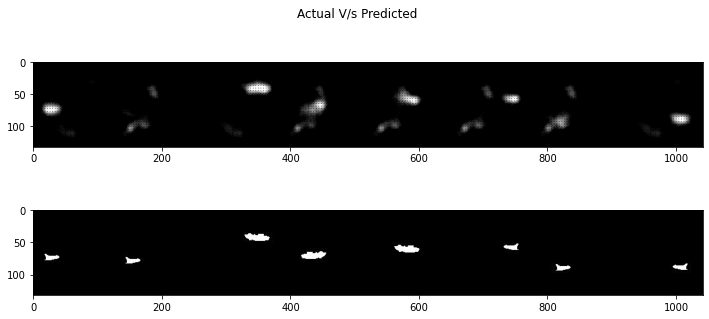

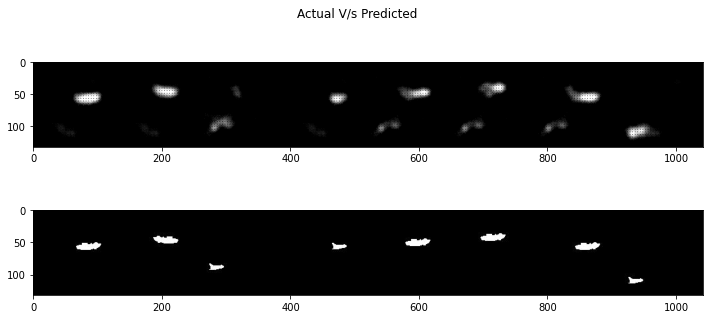

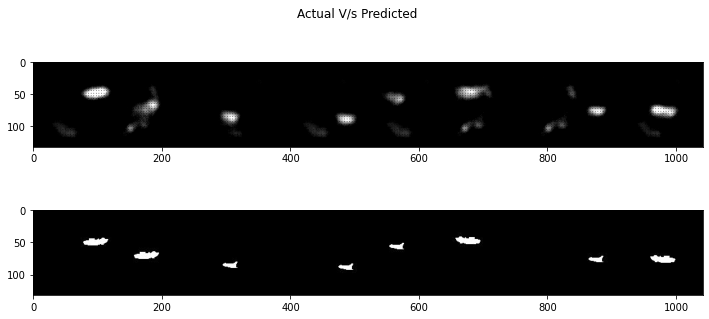

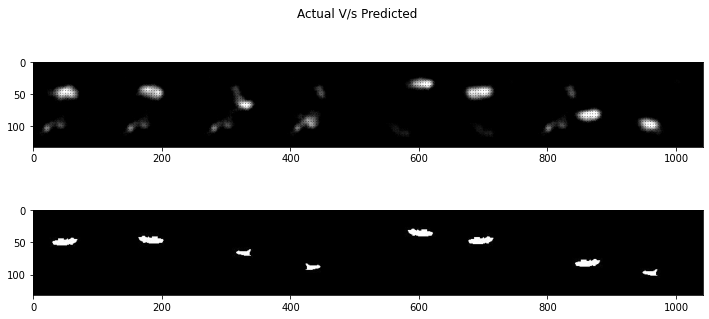

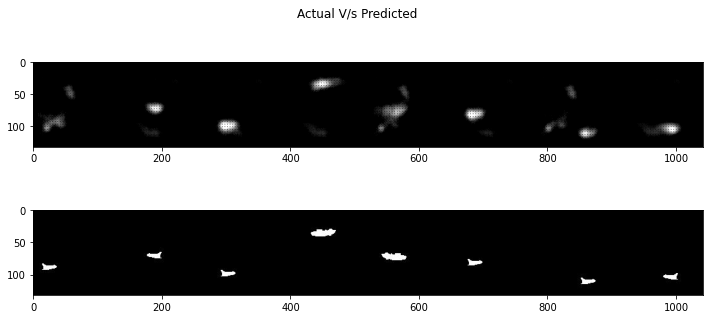

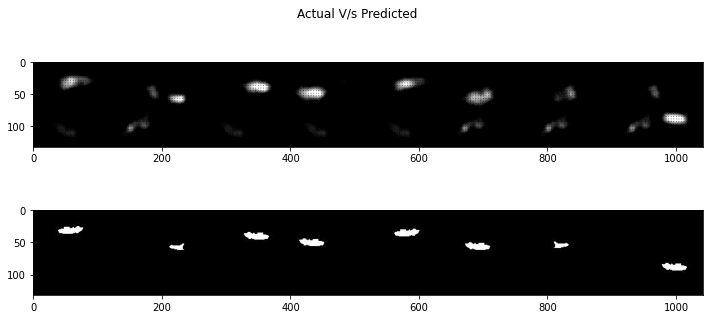

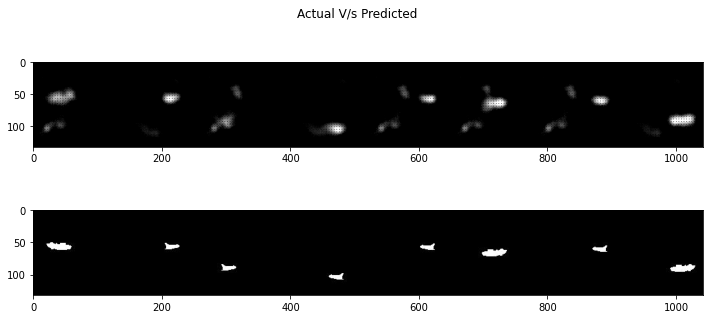

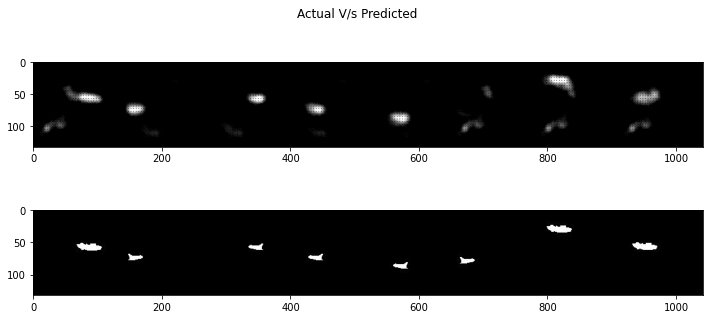

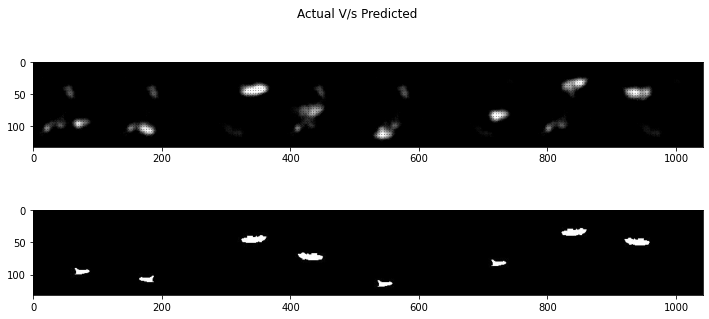

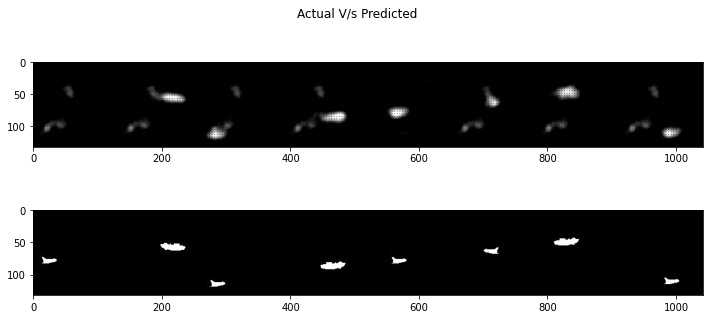

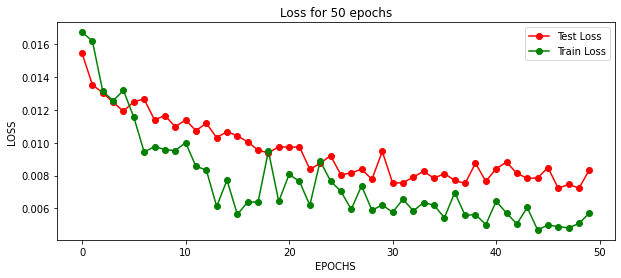

In [11]:
model = ResNet18().to(device)
optimizer = torch.optim.SGD(model.parameters(),lr = 0.01,weight_decay=1e-5)
epochs = 50
loss_func = nn.MSELoss()
test_losses = []
train_losses = []
train_batch_timer = []
test_batch_timer = []
train_model = trainModel()
test_model = testModel()
start = timeit.default_timer()
for epoch in range(0, epochs):
    epoch_start = timeit.default_timer()
    print("EPOCH:",epoch)
    train_model.train(model, device, trainloader,optimizer,loss_func,train_losses,train_batch_timer)
    test_model.test(model, device, testloader, loss_func,test_losses,test_batch_timer)
    epoch_end = timeit.default_timer()
    print("Total Time for a epoch",(epoch_end-epoch_start))
end = timeit.default_timer()

print("Total Time:",(end - start))

torch.save(model, dataroot+"model")
showMeasurePlots.plot_loss_curves(train_losses,test_losses,epochs)

In [0]:
import pandas as pd
train_batch_timer_df = pd.DataFrame()
for rec in train_batch_timer:
  train_batch_timer_df = train_batch_timer_df.append(rec)
train_batch_timer_df.reset_index(drop=True, inplace=True)
train_batch_timer_df.columns = ["batch_train_elapse",
                             "loas_time_elapse",
                             "back_prop_elapse",
                             "forward_pass_elapse",
                             "data_processing_elpase"]
# train_batch_timer_df.to_csv(dataroot+"timer.csv", index=False)
train_batch_timer_df.head()
i=1
fig = plt.figure(figsize=(20,18))
for col in train_batch_timer_df.columns:
  plt.subplot(5, 1 ,i)
  plt.plot(train_batch_timer_df[col])
  plt.title(col)
  i=i+1
fig.show()